Learning Rate = 0.1:
Model: Y = 5.3142 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3
Final loss: 0.7385



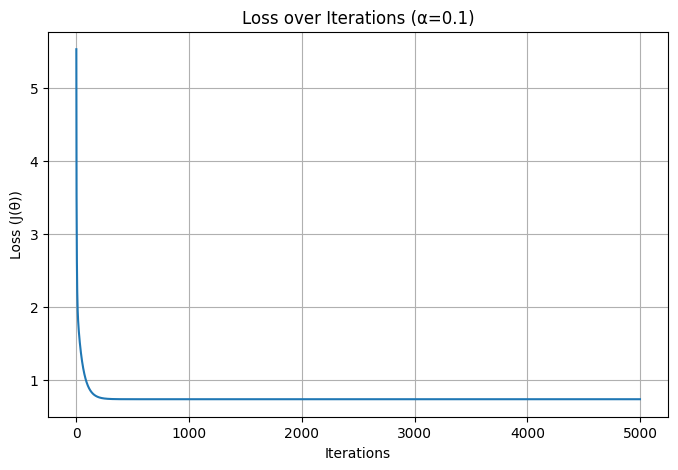

Learning Rate = 0.05:
Model: Y = 5.3142 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3
Final loss: 0.7385



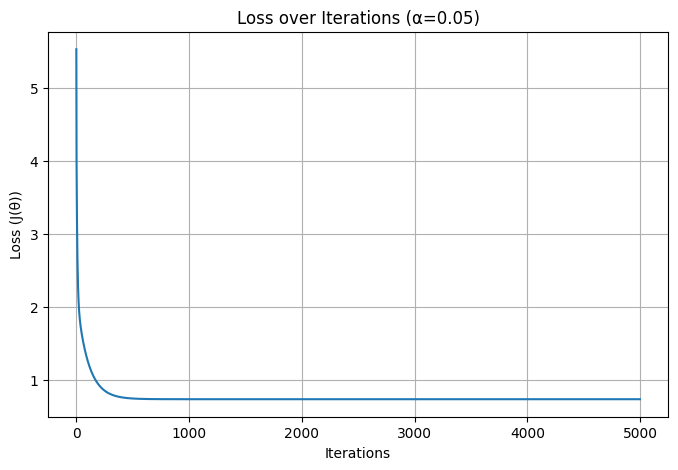

Learning Rate = 0.01:
Model: Y = 5.2787 + -1.9987*X1 + 0.5384*X2 + -0.2604*X3
Final loss: 0.7385



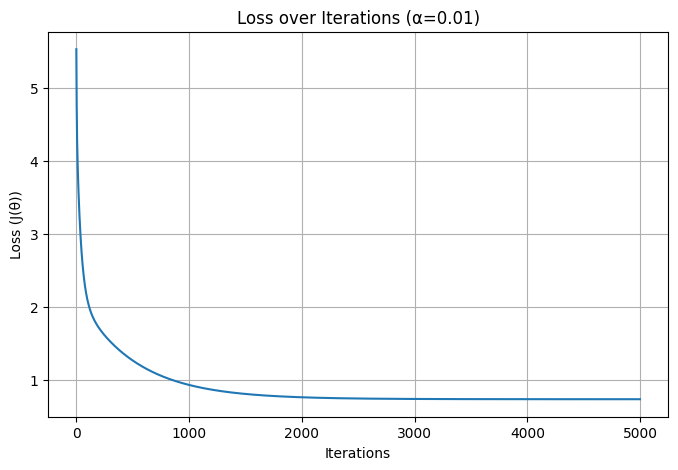

Best Model (LR = 0.1):
Y = 5.3142 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3
Best Final Loss: 0.7385

Predictions using the best model:
For (X1, X2, X3) = (1, 1, 1): Predicted Y = 3.5774
For (X1, X2, X3) = (2, 0, 4): Predicted Y = 0.2443
For (X1, X2, X3) = (3, 2, 1): Predicted Y = 0.1025


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('/content/D3.csv')
X1 = df['X1'].values
X2 = df['X2'].values
X3 = df['X3'].values
Y = df['Y'].values

#####Prepare feature matrix with all three variables
X = np.column_stack((np.ones_like(X1), X1, X2, X3))  # Add bias term (x0 = 1)
m = len(Y)

#####Gradient Descent function for multiple linear regression
def gradient_descent(X, y, alpha, num_iters):
    n = X.shape[1]
    theta = np.zeros(n)
    losses = np.zeros(num_iters)

    for i in range(num_iters):
        #Predictions
        h = np.dot(X, theta)
        #Cost
        loss = (1 / (2 * m)) * np.sum((h - y) ** 2)
        losses[i] = loss
        #Gradients
        grad = (1 / m) * np.dot(X.T, (h - y))
        #Update
        theta -= alpha * grad

    return theta, losses

######Explore different learning rates
lrs = [0.1, 0.05, 0.01]
num_iters = 5000
best_theta = None
best_loss = float('inf')
best_lr = None
lr_results = {}

for lr in lrs:
    theta, losses = gradient_descent(X, Y, lr, num_iters)
    final_loss = losses[-1]
    lr_results[lr] = {'theta': theta, 'final_loss': final_loss}

    print(f"Learning Rate = {lr}:")
    print(f"Model: Y = {theta[0]:.4f} + {theta[1]:.4f}*X1 + {theta[2]:.4f}*X2 + {theta[3]:.4f}*X3")
    print(f"Final loss: {final_loss:.4f}\n")

    if final_loss < best_loss:
        best_loss = final_loss
        best_theta = theta
        best_lr = lr

    ################Plot loss over iterations
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title(f'Loss over Iterations (α={lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (J(θ))')
    plt.grid(True)
    plt.savefig(f'loss_lr_{lr}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()

#####Report the best model
print(f"Best Model (LR = {best_lr}):")
print(f"Y = {best_theta[0]:.4f} + {best_theta[1]:.4f}*X1 + {best_theta[2]:.4f}*X2 + {best_theta[3]:.4f}*X3")
print(f"Best Final Loss: {best_loss:.4f}")

##############Predictions for new values
new_values = [
    np.array([1, 1, 1, 1]),  # (X1, X2, X3) = (1, 1, 1)
    np.array([1, 2, 0, 4]),  # (X1, X2, X3) = (2, 0, 4)
    np.array([1, 3, 2, 1])   # (X1, X2, X3) = (3, 2, 1)
]
print("\nPredictions using the best model:")
for vals in new_values:
    pred = np.dot(vals, best_theta)
    print(f"For (X1, X2, X3) = ({vals[1]}, {vals[2]}, {vals[3]}): Predicted Y = {pred:.4f}")

# Download plots
from google.colab import files
for lr in lrs:
    files.download(f'loss_lr_{lr}.png')